In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print('cancer.key():\n{}'.format(cancer.keys()))

cancer.key():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [24]:
import numpy as np

print('Shape of cancer data:{}'.format(cancer.data.shape))
print('Sample count per class:\n{}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print(np.bincount(cancer.target))
print(np.bincount([1,2,3,4,3,2,1,1,2,1,4]))

Shape of cancer data:(569, 30)
Sample count per class:
{'malignant': 212, 'benign': 357}
[212 357]
[1 4 3 2 2]


In [27]:
from sklearn.datasets import load_boston

boston = load_boston()
print('Data shpae:{}'.format(boston.data.shape))

X, y = mglearn.datasets.load_extended_boston()
print('X.shpae:{}'.format(X.shape))

Data shpae:(506, 13)
X.shpae:(506, 104)


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
print('Test set predictions:{}'.format(knn_clf.predict(X_test)))
print('Test set accuracy:{}'.format(knn_clf.score(X_test, y_test)))

Test set predictions:[1 0 1 0 1 0 0]
Test set accuracy:0.8571428571428571


c:\users\lxg\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


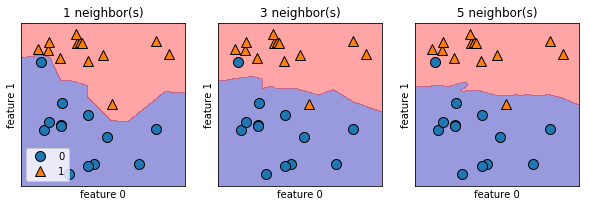

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 5], axes):
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(knn_clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

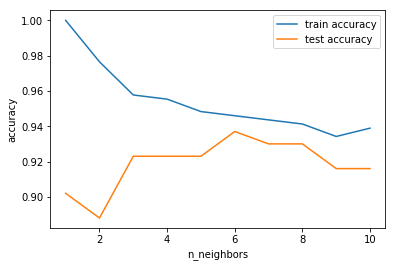

In [45]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

train_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_clf.fit(X_train, y_train)
    train_accuracy.append(knn_clf.score(X_train, y_train))
    test_accuracy.append(knn_clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, train_accuracy, label='train accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


w[0]: 0.393906  b: -0.031804


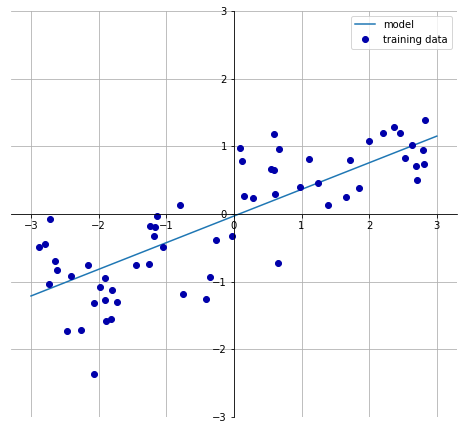

In [59]:
mglearn.plots.plot_linear_regression_wave()

In [63]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linear_reg = LinearRegression().fit(X_train, y_train)
print('linear_reg.coef_:{}'.format(linear_reg.coef_))  # 斜率（权重，系数）NumPy数组
print(type(linear_reg.coef_))
print('linear_reg.intercept_:{}'.format(linear_reg.intercept_))  # 截距 浮点数
print('Train set score:{:.2f}'.format(linear_reg.score(X_train, y_train)))
print('test set score:{:.2f}'.format(linear_reg.score(X_test, y_test)))  # 欠拟合

linear_reg.coef_:[0.39390555]
<class 'numpy.ndarray'>
linear_reg.intercept_:-0.031804343026759746
Train set score:0.67
test set score:0.66


In [66]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print('train set score:{:.2f}'.format(lr.score(X_train, y_train)))
print('test set score:{:.2f}'.format(lr.score(X_test, y_test)))  # 过拟合

train set score:0.95
test set score:0.61


In [94]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1).fit(X_train, y_train)  # L2正则，岭回归  alpha默认为1，当为0时类似LinearRegression过拟合,为10欠拟合
print('Train set score:{:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge.score(X_test, y_test)))

Train set score:0.93
Test set score:0.77


In [97]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('Train set score:{:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso.coef_ != 0)))

Train set score:0.29
Test set score:0.21
Number of features used:4


In [101]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Train set score:{:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso001.coef_ != 0)))

Train set score:0.90
Test set score:0.77
Number of features used:33


In [104]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Train set score:{:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso00001.coef_ != 0)))

Train set score:0.95
Test set score:0.64
Number of features used:96


Text(0, 0.5, 'Coefficient magnitude')

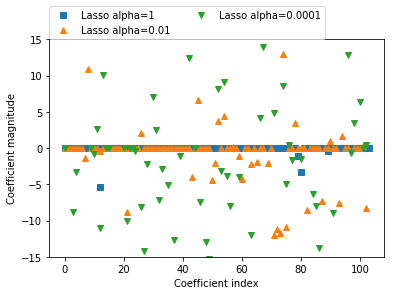

In [120]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.legend(ncol=2, loc=(0, 1))
plt.ylim(-15, 15)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

c:\users\lxg\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
c:\users\lxg\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\lxg\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


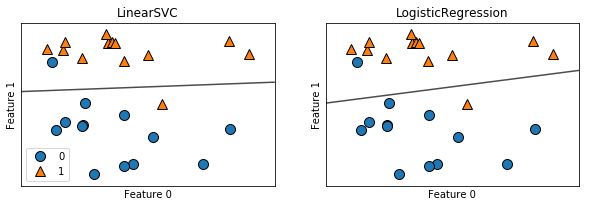

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model,ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

In [128]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
log_reg = LogisticRegression(C=100, penalty='l1').fit(X_train, y_train)  # penalty默认l2,C默认1
print('Train set score:{:.3f}'.format(log_reg.score(X_train, y_train)))
print('test set score:{:.3f}'.format(log_reg.score(X_test, y_test)))

Train set score:0.986
test set score:0.979


c:\users\lxg\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


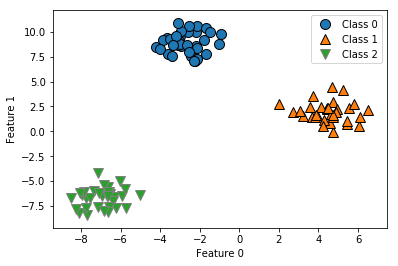

In [149]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'])

In [137]:
linear_svc = LinearSVC().fit(X, y)
print('Coff_ shape:{}'.format(linear_svc.coef_.shape))
print('Intercept shape:{}'.format(linear_svc.intercept_.shape))
print(linear_svc.intercept_)

Coff_ shape:(3, 2)
Intercept shape:(3,)
[-1.07745441  0.13140784 -0.08604925]


Text(0, 0.5, 'Feature 1')

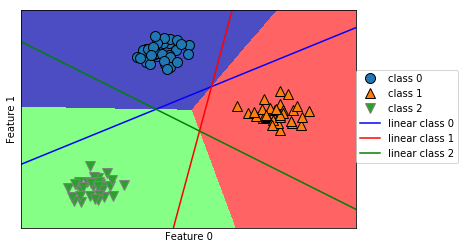

In [150]:
mglearn.plots.plot_2d_classification(linear_svc, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svc.coef_, linear_svc.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)
plt.legend(['class 0', 'class 1', 'class 2', 'linear class 0', 'linear class 1', 'linear class 2'], loc=[1, 0.3])
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [155]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print('Feature counts:\n{}'.format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
